In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import wrangle
import env
##########################
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

In [2]:
df = wrangle.zillow_data()
df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
1,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
2,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
3,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
4,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
...,...,...,...,...,...,...,...
2134884,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2134885,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2134886,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2134887,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [3]:
#worked first time because in csv propertylandusetypeid is taken off from earlier run of module
# df = wrangle.wrangled_zillow(df)
# df

In [4]:
df.head(5)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
1,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
2,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
3,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
4,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0


In [5]:
train, validate, test = wrangle.traintestsplit(df)
train, validate, test

(         bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
 693688          4.0          4.0                        3233.0   
 1059018         4.0          2.0                        1700.0   
 487189          4.0          3.0                        2154.0   
 1778398         6.0          3.0                        2939.0   
 1893167         2.0          1.0                         852.0   
 ...             ...          ...                           ...   
 2030955         1.0          1.0                         762.0   
 1599691         3.0          1.0                         982.0   
 1361741         4.0          4.0                        2301.0   
 1199867         3.0          2.0                        1410.0   
 1820876         2.0          1.0                         963.0   
 
          taxvaluedollarcnt  yearbuilt  taxamount    fips  
 693688            676363.0     2001.0    7319.46  6111.0  
 1059018           503000.0     1956.0    6157.15  6037.0  
 487189       

## 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [6]:
#we begin framing what we want
columns_to_scale = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt']

In [7]:
#we "print a copy" of our base information as to make changes while still being able to reference the orginal
train_scaled = train.copy()
#here we introduce the type of scaler to use
scaler = MinMaxScaler()
#now we are fitting the scaler to our columns that we framed
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [8]:
train_scaled
#and here is how we apply scalers, pretty simple

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
693688,0.176471,0.111111,0.080142,0.009605,2001.0,7319.46,6111.0
1059018,0.176471,0.047619,0.040903,0.007143,1956.0,6157.15,6037.0
487189,0.176471,0.079365,0.052524,0.008230,1952.0,7352.78,6037.0
1778398,0.294118,0.079365,0.072617,0.016312,1963.0,14052.77,6037.0
1893167,0.058824,0.015873,0.019197,0.003137,1950.0,2709.93,6037.0
...,...,...,...,...,...,...,...
2030955,0.000000,0.015873,0.016894,0.002893,1950.0,2792.36,6037.0
1599691,0.117647,0.015873,0.022525,0.003264,1958.0,3072.40,6059.0
1361741,0.176471,0.111111,0.056286,0.001655,1961.0,1581.46,6037.0
1199867,0.117647,0.047619,0.033480,0.003411,1966.0,3142.10,6037.0


In [9]:
train
#now we compare it to the original
#this double checks our work

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
693688,4.0,4.0,3233.0,676363.0,2001.0,7319.46,6111.0
1059018,4.0,2.0,1700.0,503000.0,1956.0,6157.15,6037.0
487189,4.0,3.0,2154.0,579520.0,1952.0,7352.78,6037.0
1778398,6.0,3.0,2939.0,1148633.0,1963.0,14052.77,6037.0
1893167,2.0,1.0,852.0,220912.0,1950.0,2709.93,6037.0
...,...,...,...,...,...,...,...
2030955,1.0,1.0,762.0,203706.0,1950.0,2792.36,6037.0
1599691,3.0,1.0,982.0,229849.0,1958.0,3072.40,6059.0
1361741,4.0,4.0,2301.0,116551.0,1961.0,1581.46,6037.0
1199867,3.0,2.0,1410.0,240181.0,1966.0,3142.10,6037.0


Text(0, 0.5, 'Count')

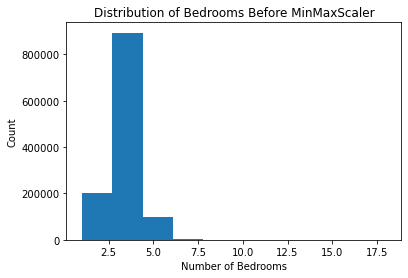

In [10]:
plt.hist(train.bedroomcnt)
#this code plots our scaled data into a histogram
plt.title('Distribution of Bedrooms Before MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
#labels for legibility sake

Text(0, 0.5, 'Count')

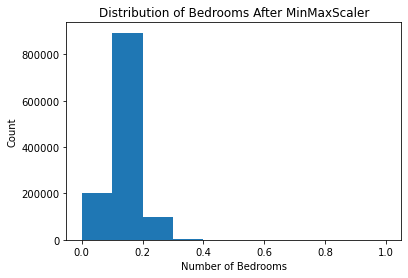

In [11]:
plt.hist(train_scaled.bedroomcnt)
#we compare graphs taking note of the shape
plt.title('Distribution of Bedrooms After MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

In [12]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    #this function is bringing in our og df to reference our scaled data, the columns of each are the ones we framed
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    #this is for plotting multiple charts
    df_scaled = df.copy()
    #make a copy
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    #fit the copy onto
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

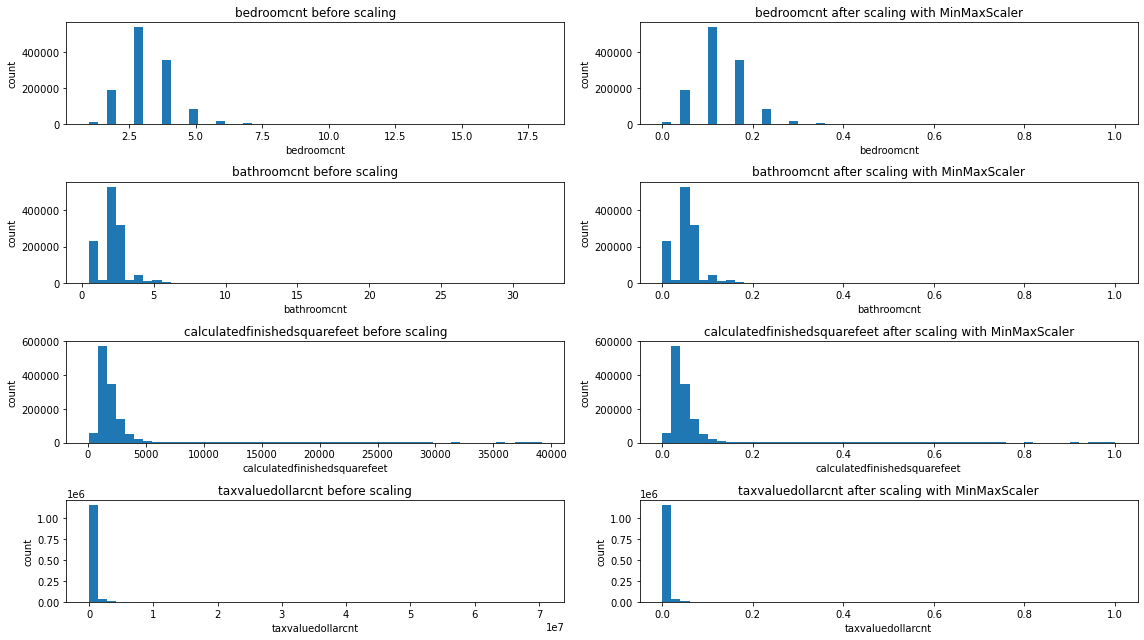

In [13]:
#min max scaler to each of the  columns we wanted
visualize_scaler(scaler=MinMaxScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

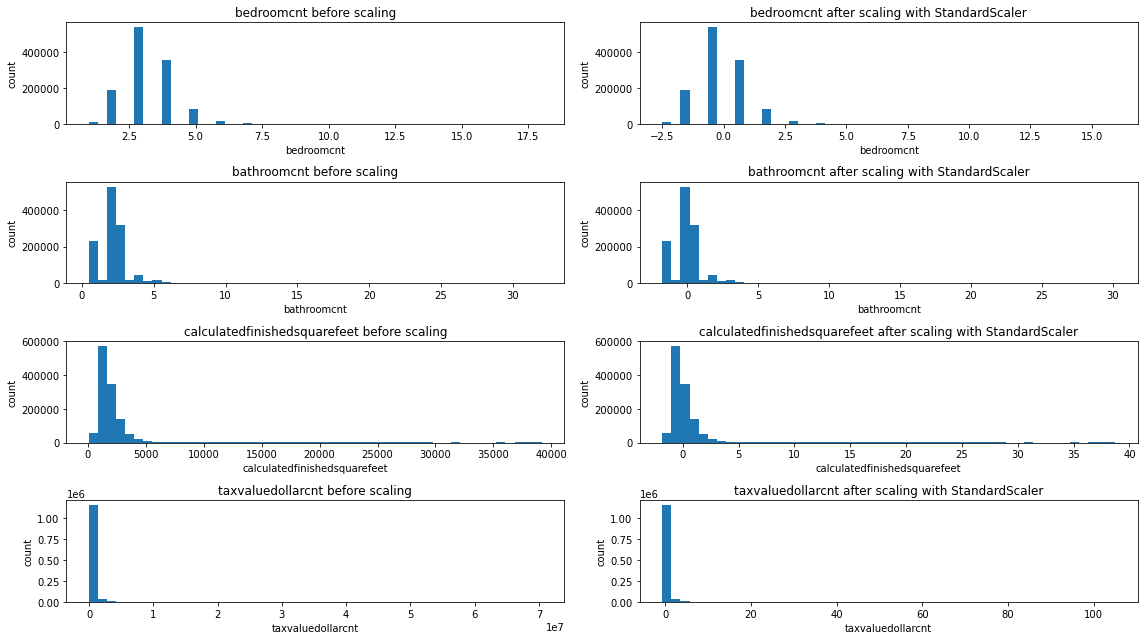

In [14]:
# StandardScaler Applied
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

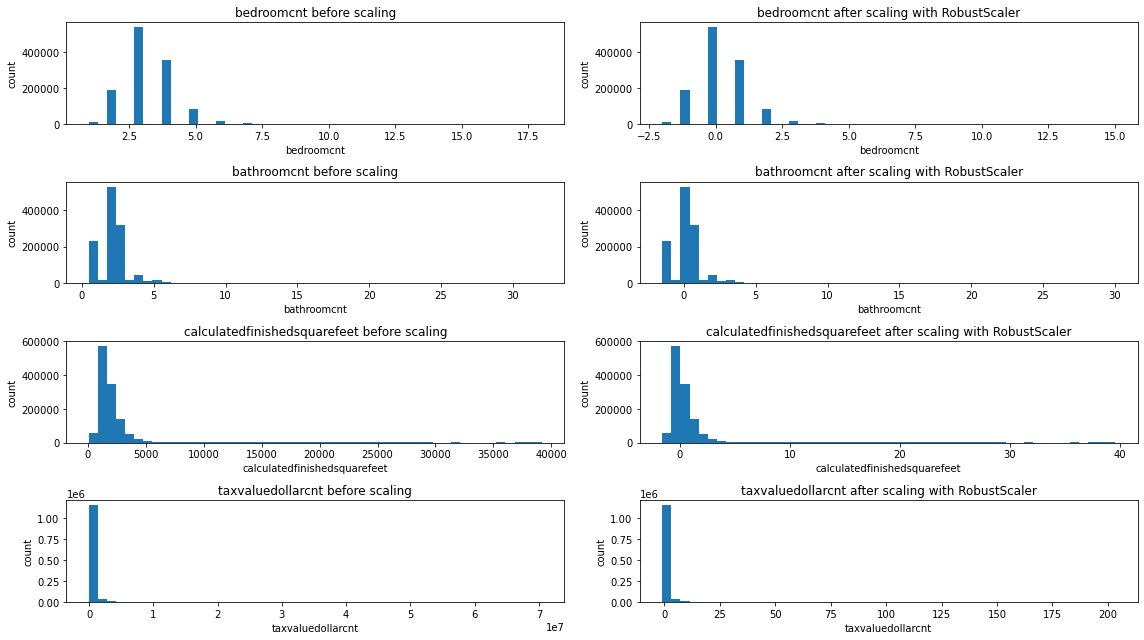

In [15]:
# RobustScaler Applied
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

## 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [16]:
scaler = MinMaxScaler()
original_data = train[['taxvaluedollarcnt']]
scaled_data = scaler.fit_transform(original_data)
#applying min max on original

In [17]:
scaled_data[:5]
#a sample of our scaled data

array([[0.00960489],
       [0.00714292],
       [0.0082296 ],
       [0.01631171],
       [0.00313691]])

In [18]:
original_data[:5]
#compare to unchanged sample

,taxvaluedollarcnt
693688,676363.0
1059018,503000.0
487189,579520.0
1778398,1148633.0
1893167,220912.0


In [19]:
scaler.inverse_transform(scaled_data)[:5]
#the floats have been rounded

array([[ 676363.],
       [ 503000.],
       [ 579520.],
       [1148633.],
       [ 220912.]])

In [20]:
(scaler.inverse_transform(scaled_data) == original_data).value_counts()
#this shows that there are discrepencies when transforming our data back and forth
#tl;dr it rounded

taxvaluedollarcnt
True                 1144004
False                  51533
dtype: int64

## 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In my own terms it renders wide data points to look like a normal distribution 
<br>
We do this to reduce the impact of marginal outliers

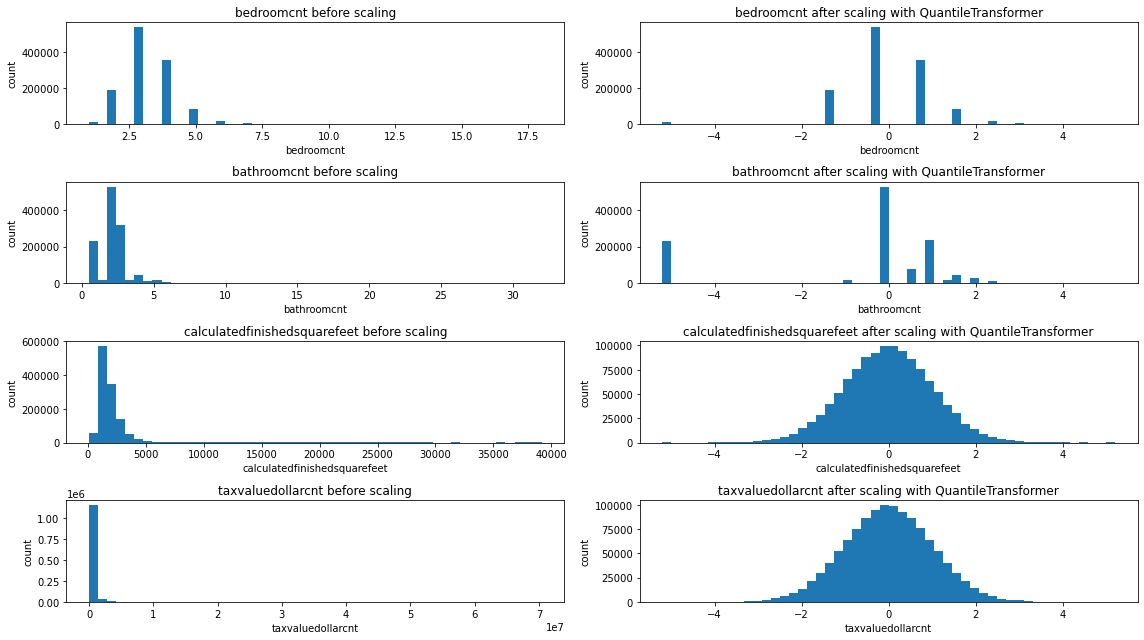

In [22]:
#applying quantile tranformer
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), df=train, columns_to_scale=columns_to_scale, bins=50)

## 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

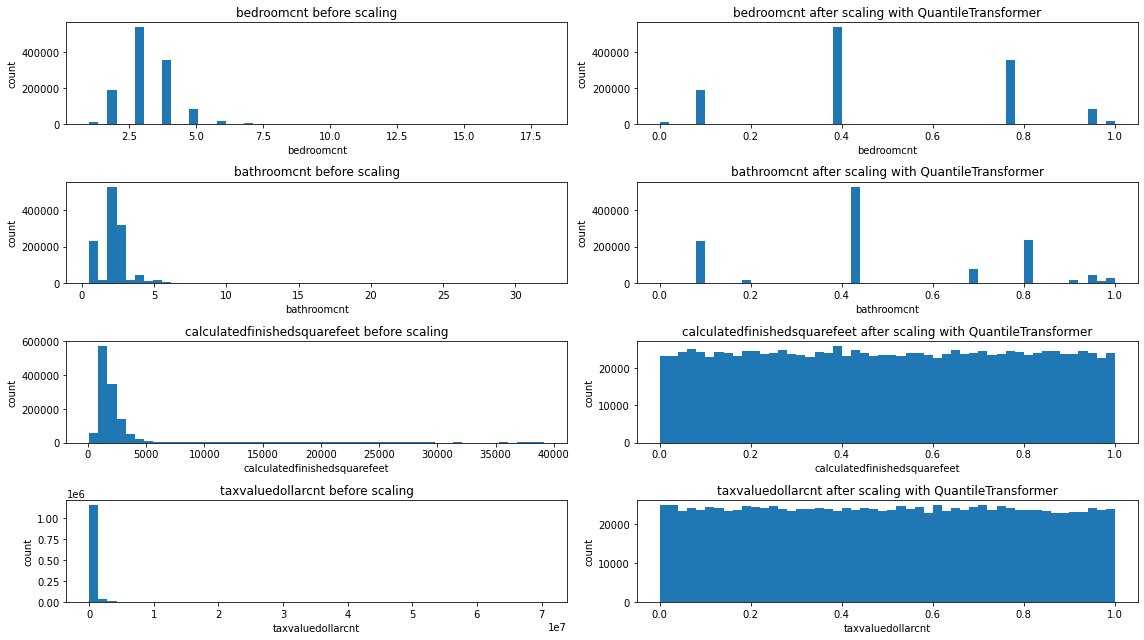

In [23]:
#the calculated square feet and tax value dollar now look like a normal distribution
visualize_scaler(scaler=QuantileTransformer(), df=train, columns_to_scale=columns_to_scale, bins=50)

## 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [24]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedroomcnt', 'bathroomcnt', 'taxvaluedollarcnt', 'calculatedfinishedsquarefeet'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [25]:
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)

In [26]:
train_scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
693688,0.176471,0.111111,0.080142,0.009605,2001.0,7319.46,6111.0
1059018,0.176471,0.047619,0.040903,0.007143,1956.0,6157.15,6037.0
487189,0.176471,0.079365,0.052524,0.008230,1952.0,7352.78,6037.0
1778398,0.294118,0.079365,0.072617,0.016312,1963.0,14052.77,6037.0
1893167,0.058824,0.015873,0.019197,0.003137,1950.0,2709.93,6037.0
...,...,...,...,...,...,...,...
2030955,0.000000,0.015873,0.016894,0.002893,1950.0,2792.36,6037.0
1599691,0.117647,0.015873,0.022525,0.003264,1958.0,3072.40,6059.0
1361741,0.176471,0.111111,0.056286,0.001655,1961.0,1581.46,6037.0
1199867,0.117647,0.047619,0.033480,0.003411,1966.0,3142.10,6037.0


In [27]:
validate_scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1566345,0.058824,0.015873,0.021040,0.000595,1956.0,836.37,6037.0
1687988,0.117647,0.015873,0.025212,0.003106,1948.0,2734.19,6037.0
803097,0.117647,0.047619,0.025161,0.001590,1987.0,2420.10,6037.0
1136459,0.058824,0.015873,0.020938,0.001859,1923.0,2042.30,6037.0
794204,0.058824,0.015873,0.023805,0.001880,1905.0,1653.58,6037.0
...,...,...,...,...,...,...,...
572741,0.117647,0.015873,0.033122,0.004480,1908.0,4034.72,6037.0
1399512,0.117647,0.047619,0.034274,0.004275,1964.0,3194.98,6111.0
1310576,0.176471,0.047619,0.055263,0.007828,1950.0,6267.62,6059.0
76532,0.058824,0.047619,0.028668,0.006319,1953.0,5442.44,6037.0


In [28]:
test_scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1908546,0.176471,0.047619,0.044128,0.001354,1970.0,1579.42,6059.0
1747999,0.058824,0.015873,0.015665,0.002653,1906.0,2357.42,6059.0
2130973,0.176471,0.079365,0.048684,0.001172,1953.0,1217.66,6037.0
1694493,0.117647,0.047619,0.034427,0.001688,1979.0,1824.15,6037.0
166396,0.176471,0.047619,0.044794,0.014412,1956.0,11539.96,6037.0
...,...,...,...,...,...,...,...
1423163,0.058824,0.015873,0.029999,0.004293,1953.0,3748.60,6037.0
1479549,0.117647,0.015873,0.037524,0.002530,1924.0,2331.25,6037.0
1748075,0.235294,0.095238,0.054904,0.001386,1957.0,1343.66,6059.0
65579,0.058824,0.015873,0.018890,0.003367,1971.0,3336.36,6037.0
